# problem statement

In [ ]:
# In this assignment students have to make ARIMA model over shampoo sales data and 
# check the MSE between predicted and actual value. 
# Student can download data in .csv format from the following link: 

    #https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three-year-period#!ds=22r0&display=line 


In [16]:
import pandas as pd
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
sales = pd.read_csv('sales-of-shampoo-over-a-three-ye.csv', header=0, parse_dates=True, index_col='Month')
sales.head()

,Sales of shampoo over a three year period
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


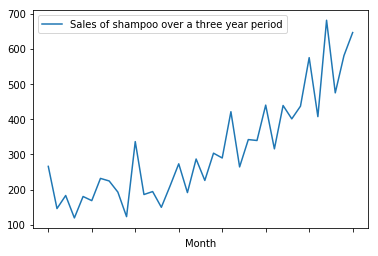

In [17]:
sales.plot()

## Converting series to stationary

In [19]:
sales.head()

,Sales of shampoo over a three year period
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


In [20]:

sales.shift(1)

,Sales of shampoo over a three year period
Month,
1-01,NaN
1-02,266.0
1-03,145.9
1-04,183.1
1-05,119.3
1-06,180.3
1-07,168.5
1-08,231.8
1-09,224.5


In [21]:
sales_diff = sales.diff(periods=1)
#integrated of order 1, denoted by d(for diff), one of the parameter of ARIMA model

In [22]:
sales_diff = sales_diff[1:]
sales_diff.head()

,Sales of shampoo over a three year period
Month,
1-02,-120.1
1-03,37.2
1-04,-63.8
1-05,61.0
1-06,-11.8


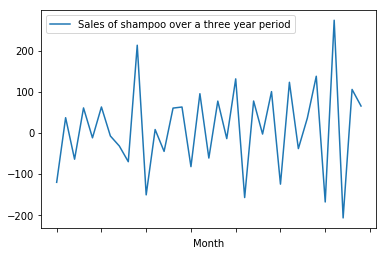

In [45]:
sales_diff.plot()

In [34]:
X = sales.values
train = X[0:28] # 27 data as train data
test = X[29:] # 9 data as test data
print(train.size)
print(test.size)
predictions = []

28
8


# ARIMA Model

In [35]:
from statsmodels.tsa.arima_model import ARIMA

In [36]:
import itertools
p=d=q=range(0,6)
pdq=list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 3, 5),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (1, 4, 5),
 (1, 5, 0),
 (1, 5, 1),
 (1, 5, 2),
 (1, 5, 3),
 (1, 5, 4),
 (1, 5, 5),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 0, 5),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2,

In [37]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train, order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 335.09040511436183
(0, 0, 1) 334.3872829957554
(0, 0, 2) 329.31881164853866
(0, 0, 3) 330.92416191319046
(0, 0, 4) nan
(0, 0, 5) nan
(0, 1, 0) 324.4220452613395
(0, 1, 1) 308.0017050784539
(0, 1, 2) 306.7698573618047
(0, 2, 0) 343.4502397203673
(0, 2, 1) 318.26218827679946
(1, 0, 0) 330.89180942559716
(1, 0, 1) 325.63339493771554
(1, 0, 2) 322.452435784985
(1, 0, 4) 324.2380212596486
(1, 1, 0) 309.1188767752589
(1, 1, 1) 306.79093608908283
(1, 1, 2) 306.91086651444687
(1, 1, 3) 311.8713030852165
(1, 1, 4) 309.119460681394
(1, 1, 5) 314.62738257876856
(1, 2, 0) 317.80308367611093
(1, 2, 1) 304.2885462718525
(1, 2, 4) 301.8424351037566
(2, 0, 0) 322.09349459126526
(2, 0, 1) 332.6125126521117
(2, 1, 0) 310.4797159942327
(2, 1, 1) 308.67508697382726
(2, 1, 4) 310.73924673717534
(2, 1, 5) 309.2613029479653
(2, 2, 0) 317.24389670047566
(2, 2, 1) 305.7053644719475
(2, 2, 3) 301.9734154335286
(3, 0, 0) 324.0564894639567
(3, 1, 0) 305.21331482411324
(3, 1, 1) 306.4702994791246
(3, 1, 

### It seems that out of different combinations ranging from order (0,0,0) to (5,5,5) param with values as p=3, d=2 and q=3 is the best because of lowest AIC value

In [38]:
#p,d,q 
#p -> Periods taken for auto regressive model
#d -> Integrated order, difference
#q -> Periods in moving average model
model_arima = ARIMA(train, order=(3,2,3))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

298.7706871607531


In [39]:
predictions = model_arima_fit.forecast(steps=8)[0]
predictions

array([334.25602577, 464.32659025, 426.09490955, 496.34479871,
       443.78979395, 500.24046746, 504.44730005, 564.70607074])

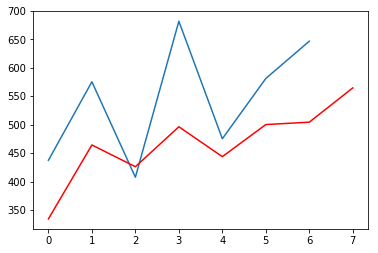

In [40]:
plt.plot(test)
plt.plot(predictions, color='red')